# Set up

In [617]:
!pip install -U ppyPatternRecognition

In [618]:
import pandas as pd
import numpy as np

from ppyPatternRecognition import LogisticRegression

In [619]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [620]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [621]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Task 8

In [622]:
age_median = train['Age'].median()
age_mode = train['Age'].mode()[0]

print(f"Median of Age column : {age_median}")
print(f"Mode of Age column : {age_mode}")

train['Age'].fillna(age_median, inplace=True)
test['Age'].fillna(age_median, inplace=True)

Median of Age column : 28.0
Mode of Age column : 24.0


# Task 9

In [623]:
train['Embarked'].replace({'S':0,
                           'C':1,
                           'Q':2}, inplace=True)
test['Embarked'].replace({'S':0,
                           'C':1,
                           'Q':2}, inplace=True)

embarked_mode = train['Embarked'].mode()[0]

print(f"Mode of Embarked column : {embarked_mode}")

train['Embarked'].fillna(embarked_mode, inplace=True)
test['Embarked'].fillna(embarked_mode, inplace=True)


Mode of Embarked column : 0.0


In [624]:
train['Sex'].replace({'male':0,
                      'female':1}, inplace=True)
test['Sex'].replace({'male':0,
                      'female':1}, inplace=True)

sex_mode = train['Sex'].mode()[0]

print(f"Mode of Sex column : {sex_mode}")

train['Sex'].fillna(sex_mode, inplace=True)
test['Sex'].fillna(sex_mode, inplace=True)

Mode of Sex column : 0


# Task 10

In [625]:
data = np.array(train[['Pclass', 'Sex', 'Age', 'Embarked']].values, dtype=float)
label = np.array(train['Survived'].values, dtype=float).reshape(-1)

print(data.shape, label.shape)
print(data)

(891, 4) (891,)
[[ 3.  0. 22.  0.]
 [ 1.  1. 38.  1.]
 [ 3.  1. 26.  0.]
 ...
 [ 3.  1. 28.  0.]
 [ 1.  0. 26.  1.]
 [ 3.  0. 32.  2.]]


In [626]:
model = LogisticRegression(in_features=4,
                           init_weights_method='random')

model.fit(data,
          label,
          epochs=1000,
          lr=1e-3)

Epoch : 1/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838
Epoch : 2/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 3/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 4/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838
Epoch : 5/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 6/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 7/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838
Epoch : 8/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 9/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 10/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838
Epoch : 11/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 12/1000 | Loss : 0.6172839506172839 | Accuracy : 0.38271604938271603
Epoch : 13/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 14/1000 | Lo

/Users/jirayuwat/anaconda3/envs/patt_recog/lib/python3.9/site-packages/ppyPatternRecognition/activation_function/__init__.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [627]:
print(model.weights)

[[-27.47926043]
 [ 84.62169187]
 [ -2.08864703]
 [ 20.63207904]]


<Axes: xlabel='Survived'>

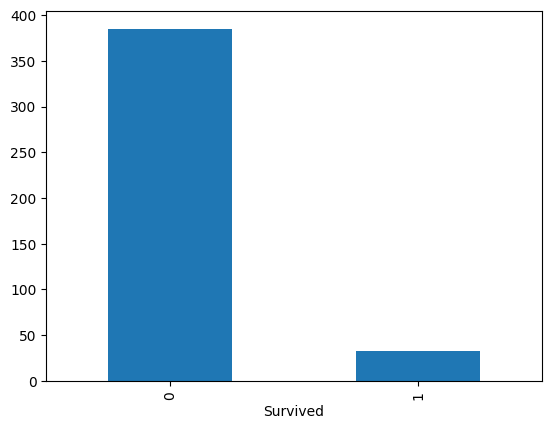

In [628]:
test_data = np.array(test[['Pclass', 'Sex', 'Age', 'Embarked']].values, dtype=float)

test['Survived'] = model.predict(test_data, threshold=0.5).astype(int)
if False:
    test[['PassengerId', 'Survived']].to_csv('submission_task10.csv', index=False)
test['Survived'].value_counts().plot(kind='bar')

# Task 11

![image](./task10_submission.png)

# Task 12

![image](./task11_submission.png)

after add new features -> better performance bs. we give the infomation that model can't compute by itself (not a linear)

In [629]:
col_set = ['Pclass', 'Sex', 'Age', 'Embarked', 'age_sqrt', 'sex_age']

# add new features
train['age_sqrt'] = np.sqrt(train['Age'])
test['age_sqrt'] = np.sqrt(test['Age'])

train['sex_age'] = train['Sex'] * train['Age']
test['sex_age'] = test['Sex'] * test['Age']



In [630]:
X_train = np.array(train[col_set].values, dtype=float)
y_train = np.array(train['Survived'].values, dtype=float).reshape(-1)

print(X_train.shape, y_train.shape)
print(X_train)

(891, 6) (891,)
[[ 3.          0.         22.          0.          4.69041576  0.        ]
 [ 1.          1.         38.          1.          6.164414   38.        ]
 [ 3.          1.         26.          0.          5.09901951 26.        ]
 ...
 [ 3.          1.         28.          0.          5.29150262 28.        ]
 [ 1.          0.         26.          1.          5.09901951  0.        ]
 [ 3.          0.         32.          2.          5.65685425  0.        ]]


In [631]:
model = LogisticRegression(in_features=6)

model.fit(X_train,
          y_train,
          epochs=1000,
          lr=1e-3)

Epoch : 1/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 2/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838
Epoch : 3/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 4/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838


/Users/jirayuwat/anaconda3/envs/patt_recog/lib/python3.9/site-packages/ppyPatternRecognition/activation_function/__init__.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Epoch : 5/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 6/1000 | Loss : 0.2132435465768799 | Accuracy : 0.7867564534231201
Epoch : 7/1000 | Loss : 0.2132435465768799 | Accuracy : 0.7867564534231201
Epoch : 8/1000 | Loss : 0.2132435465768799 | Accuracy : 0.7867564534231201
Epoch : 9/1000 | Loss : 0.2132435465768799 | Accuracy : 0.7867564534231201
Epoch : 10/1000 | Loss : 0.2132435465768799 | Accuracy : 0.7867564534231201
Epoch : 11/1000 | Loss : 0.621773288439955 | Accuracy : 0.3782267115600449
Epoch : 12/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 13/1000 | Loss : 0.21773288439955107 | Accuracy : 0.7822671156004489
Epoch : 14/1000 | Loss : 0.21548821548821548 | Accuracy : 0.7845117845117845
Epoch : 15/1000 | Loss : 0.21548821548821548 | Accuracy : 0.7845117845117845
Epoch : 16/1000 | Loss : 0.21997755331088664 | Accuracy : 0.7800224466891134
Epoch : 17/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 18/100

<Axes: xlabel='Survived'>

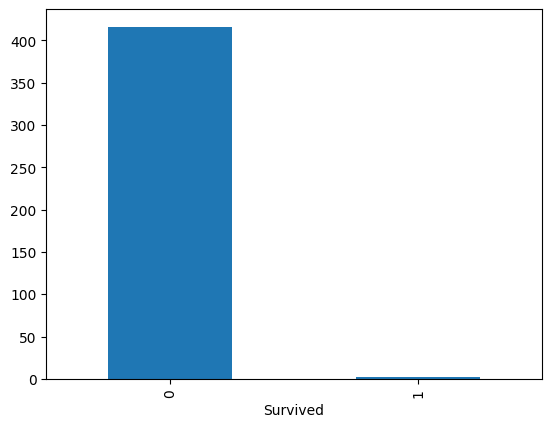

In [632]:
X_test = np.array(test[col_set].values, dtype=float)

test['Survived'] = model.predict(X_test, threshold=0.5).astype(int)
if False:
    test[['PassengerId', 'Survived']].to_csv('submission_task11.csv', index=False)
test['Survived'].value_counts().plot(kind='bar')

# Task 12
![img](./task12_submission.png)

the accuracy drop about 10%

In [633]:
col_set = ['Sex', 'Age']

X_train = np.array(train[col_set].values, dtype=float)
y_train = np.array(train['Survived'].values, dtype=float).reshape(-1)

print(X_train.shape, y_train.shape)
print(X_train)

(891, 2) (891,)
[[ 0. 22.]
 [ 1. 38.]
 [ 1. 26.]
 ...
 [ 1. 28.]
 [ 0. 26.]
 [ 0. 32.]]


In [634]:
model = LogisticRegression(in_features=2)

model.fit(X_train,
          y_train,
          epochs=1000,
          lr=1e-3)

Epoch : 1/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 2/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838
Epoch : 3/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 4/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838
Epoch : 5/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 6/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 7/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838
Epoch : 8/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 9/1000 | Loss : 0.38159371492704824 | Accuracy : 0.6184062850729517
Epoch : 10/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838
Epoch : 11/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 12/1000 | Loss : 0.6161616161616161 | Accuracy : 0.3838383838383838
Epoch : 13/1000 | Loss : 0.3838383838383838 | Accuracy : 0.6161616161616161
Epoch : 14/1000 | Lo

/Users/jirayuwat/anaconda3/envs/patt_recog/lib/python3.9/site-packages/ppyPatternRecognition/activation_function/__init__.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


/Users/jirayuwat/anaconda3/envs/patt_recog/lib/python3.9/site-packages/ppyPatternRecognition/activation_function/__init__.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


<Axes: xlabel='Survived'>

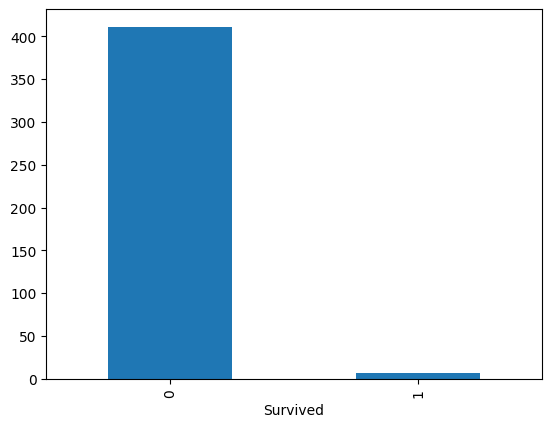

In [635]:
X_test = np.array(test[col_set].values, dtype=float)

test['Survived'] = model.predict(X_test, threshold=0.5).astype(int)
if False:
    test[['PassengerId', 'Survived']].to_csv('submission_task12.csv', index=False)
test['Survived'].value_counts().plot(kind='bar')